## Pandas

1. 创建与认识Series
2. Series基本操作
3. 创建与认识DataFrame
4. dataframe基本操作
5. dataframe/Series拼接
6. DataFrame文件操作

In [30]:
import pandas as pd
import numpy as np
%matplotlib inline

* 创建与认识Series

In [20]:
# 1. create series
a = pd.Series([1, 2, 3], index = ['a', 'b', 'c'])
# 2. get values
print('a.values: ',a.values)
# 3. get index
print('a.index: ', a.index)
# 4. length
print('len series: ', len(a))
# 5. unique
print('unique: ', a.unique())
# 6. size
print('size: ', a.size)

a.values:  [1 2 3]
a.index:  Index(['a', 'b', 'c'], dtype='object')
len series:  3
unique:  [1 2 3]
size:  3


* Series基本操作

In [60]:
# 2. Series merge
print('append')
a = pd.Series([1, 2, 3])
b = pd.Series([4, 5, 6])
c = a.append(b)
print('c = a.append(b)')
print(c)
print()

# 1. Series index
print('Series index')
print('c[[1, 2]]',)
print(c[[1, 2]])
print()
print('c[:3]')
print(c[:3])
print()

# 3. Series operator
print('operator')
a.add(b)
a.sub(b)
a.mul(b)
a.div(b)
a.median()
a.sum()
a.max()
a.min()

# 4. series.map
print('map')
print(a.map(lambda x: x+1))

append
c = a.append(b)
0    1
1    2
2    3
0    4
1    5
2    6
dtype: int64

Series index
c[[1, 2]]
1    2
1    5
2    3
2    6
dtype: int64

c[:3]
0    1
1    2
2    3
dtype: int64

operator
map
0    2
1    3
2    4
dtype: int64


* 创建与认识DataFrame

In [62]:
# 1. 创建dataframe
data = pd.DataFrame({'a': np.random.rand(10), 'b': np.random.rand(10)})
# pd.DataFrame([1,2,3,4,5], index = [1,2,3,4,5], columns = ['a'])
# 2. 类型
data.dtypes
# 3. 展示头尾3行
data.head(3)
data.tail(3)
# 4. index
data.index
# 5. 列名字
data.columns
# 6. 值
data.values
# 7. 描述
data.describe()

,a,b
count,10.000000,10.000000
mean,0.572461,0.508140
std,0.326542,0.375190
min,0.139998,0.002825
25%,0.239244,0.163125
50%,0.667085,0.556206
75%,0.791472,0.850790
max,0.978202,0.962579


* DataFrame基本操作  
(1) 基本操作  
(2) 索引  
(3) 缺失值处理  
(4) 删除  

In [91]:
# 基本操作
# 1. 转秩
data.T
# 2. 排序
data.sort_values(by = 'a', ascending = False)
# df.sort_values(by=['age', 'visits'], ascending=[False, True])
# 3. copy
data1 = data.copy()
# 4. replace
data1.iloc[[0,3,5,7],[0,1]] = np.nan
data1.loc[[1],['a', 'b']] = np.nan
# 5. operation
data1.mean()
data1.describe()
data1.diff()
# 6. map
data1['class'] = np.random.randint(0, 10, 10)
data1['class'].map({1: True, 0: False})
# 7. idxmin, idxmax
data1.sum().idxmax()
# 8. nlargest
data1['class'].nlargest(3)
# 9. shift
data1.shift()
# 10. rename
data1.rename(index = {4: 'Chg'})
# 11. set_index
data1.set_index('a')
# 12. count 仅仅计算非空数值个数
data1.count()
# 13. corr计算
data1.corr()
# 14. groupby
data1.groupby('class').sum()
# data1.groupby('class').apply(lambda x: x.count())

,a,b
class,,
3,0.492334,0.936870
4,0.019600,0.202513
5,0.000000,0.000000
6,0.956879,0.438772
7,0.000000,0.000000
9,0.030023,0.000008


In [106]:
# 索引
data1 = pd.DataFrame({'a': np.random.rand(10), 'b': np.random.rand(10)})
data1['class'] = np.random.randint(0, 10, 10)
# 1. 索引index
data1[:3]
data1.iloc[:3,:1]
data1[['a', 'b']].head(3)
data1.a
# 2. sigle point index
data1.iat[1, 1]
# 3. conditional index
data1[data['a']>0.1]
# 4. Bool index example:
data1['class'] = np.random.randint(0, 10, 10)
data1[data1['class'].isin([1, 7])]

,a,b,class
6,0.883251,0.067875,1
9,0.076889,0.549810,1


In [141]:
# 缺失值处理
# 1. isnull
data1.isnull()
# 2. fillna
# https://blog.csdn.net/brucewong0516/article/details/80406564
# ffill, bfill
data1 = data1.fillna(1)
data1.loc[[1, 7, 8],['a', 'b']] = np.nan
# 3. dropna
# dropna any row contains nan
data1.dropna(how = 'any')
# 4. interpolate
data1.interpolate(method = 'linear', axis = 0)

,a,b,class
0,0.302378,0.865133,1
1,0.582832,0.538050,6
2,0.863287,0.210967,0
3,0.535621,0.690296,7
4,0.893233,0.702912,8
5,0.300760,0.358660,3
6,0.405917,0.855533,4
7,0.454212,0.857856,3
8,0.502508,0.860180,3
9,0.550803,0.862503,3


In [127]:
# 删除
# 1. drop
data = pd.DataFrame({'a': np.random.rand(10), 'b': np.random.rand(10)})
data.drop([0, 1], axis = 0)
data.drop(['a'], axis = 1)
# 2. pop
data.pop('a')
data.head()

,b
0,0.688794
1,0.752927
2,0.851014
3,0.102354
4,0.331723


* dataframe/series 拼接  
(1) join  
(2) concat  
(3) merge  
(4) append  
(5) insert  
reference: http://pandas.pydata.org/pandas-docs/stable/merging.html

In [89]:
# merge, concat, join
data1.index = range(len(data1))
del data1['class']
data1 = pd.concat([data1, pd.DataFrame({'a': 0, 'b': 1}, index = [9])])
pd.merge(data1, data, on = 'a')

,a,b_x,b_y,class
0,0.026302,0.486772,0.486772,6
1,0.769219,0.287223,0.287223,7
2,0.744479,0.472824,0.472824,3
3,0.255832,0.058203,0.058203,4
4,0.159712,0.746431,0.746431,5


* dataframe文件操作  
pd.read_excel  
pd.read_csv  
pd.read_table  
pd.to_csv  
pd.to_excel  

* pandas plot

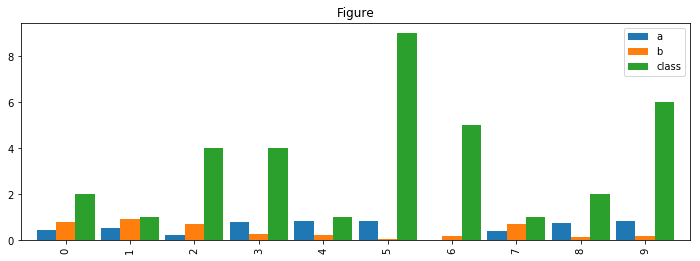

In [8]:
data1.plot(kind = 'bar', width = 0.9, figsize = (12, 4), title = 'Figure')

* Other  
(1) pivot table  
(2) time series  
(2) MultiIndex

* example 1: pivot table

In [142]:
# pivot table
df = pd.DataFrame({'A' : ['one', 'one', 'two', 'three'] * 3,
                'B' : ['A', 'B', 'C'] * 4,
                'C' : ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                'D' : np.random.randn(12),
                'E' : np.random.randn(12)})
# mean
pd.pivot_table(df, index=['A', 'B'])
pd.pivot_table(df, values=['D', 'E'], index=['A', 'B'], columns= ['C'], aggfunc=[np.sum, len], fill_value = -9999)

sum                                          len              \
                   D                         E                  D           E   
C                bar          foo          bar          foo   bar   foo   bar   
A     B                                                                         
one   A     0.203946     2.603182     0.873639     0.863885     1     1     1   
      B     0.401208     0.789518    -1.374817     1.597861     1     1     1   
      C     0.773235     2.441132    -0.570883    -0.887078     1     1     1   
three A     1.002401 -9999.000000     0.599964 -9999.000000     1 -9999     1   
      B -9999.000000     1.060296 -9999.000000     0.691300 -9999     1 -9999   
      C    -0.216838 -9999.000000     0.880066 -9999.000000     1 -9999     1   
two   A -9999.000000    -0.535980 -9999.000000     0.575508 -9999     1 -9999   
      B    -0.150490 -9999.000000     0.485981 -9999.000000     1 -9999     1   
      C -9999.000000    -0.420601 -9999.000000    -2.652556 -9999     1 -9999   

               
               
C         foo  
A     B        
one   A     1  
      B     1  
      C     1  
three A -9999  
      B     1  
      C -9999  
two   A     1  
      B -9999  
      C     1

* example 2: time series

In [143]:
# time series
# datetime.weekday
dti = pd.date_range(start='2018-01-01', end='2018-12-31', freq='D') 
tsdata = pd.DataFrame({'rand': np.random.rand(len(dti))}, index = dti)
tsdata[tsdata.index.weekday == 2].sum()

# resample,change the frequency
tsdata.resample('M').sum()

# change the time zone
s = pd.bdate_range('today', periods=1, freq='D')
ts = pd.Series(np.random.randn(len(s)), s)
ts.tz_localize('EST').tz_convert('Asia/Shanghai') # con

2018-09-24 12:14:36.497172+08:00    0.543329
Freq: D, dtype: float64

* example 3: multi-index

In [28]:
# multi-index series
letters = ['A', 'B', 'C']
numbers = list(range(10))
# build index(2-dim)
mi = pd.MultiIndex.from_product([letters, numbers])
s = pd.Series(np.random.rand(30), index = mi)
# loc
s.loc[:, [1,3,6]]
# slice
s.loc[pd.IndexSlice[:'B', 5:]]

A  5    0.186194
   6    0.492071
   7    0.380948
   8    0.459392
   9    0.449222
B  5    0.660779
   6    0.542115
   7    0.756301
   8    0.191922
   9    0.744527
dtype: float64

In [27]:
# dataframe multi-index
data = np.random.rand(20)
data = data.reshape((10,2))
data_df = pd.DataFrame(data, index = [['A']*5+['B']*5, list(range(5))*2], columns = ['a', 'b'])
data_df.index.names=['first','second']
data_df.groupby('first').sum()
data_df.groupby('second').sum()
data_df = data_df.stack()
print(data_df.head(5))
data_df = data_df.unstack()
print(data_df.head(5))

first  second   
A      0       a    0.224348
               b    0.307764
       1       a    0.204913
               b    0.926158
       2       a    0.047661
dtype: float64
                     a         b
first second                    
A     0       0.224348  0.307764
      1       0.204913  0.926158
      2       0.047661  0.890248
      3       0.859391  0.142464
      4       0.593718  0.766269
